In [61]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from scipy.sparse import csr_matrix

from sklearn.model_selection import KFold, train_test_split
from sklearn.decomposition import NMF
# from sklearn.metrics import mean_squared_error #explained_variance_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression

## Perform NMF (n_comp=13,16) and Logistic Regression (CV=5)

In [27]:
vficf = pd.read_csv('data/vficf.csv', index_col=0)
vficf.head()

,"Богданов и партнеры""""""","""""dakineshop.ru""""""","117""""""","12""""""","13""""""","17""""""","18""""""","18.""","34""""""","38""""""",...,Zhejiang Restaurant,Zoo,Zoo Exhibit,"quando e dove vuoi tu """"""",Çöp Şiş Place,"Корпорация СБР""","д.24""""""","не Дай Другим""""""","площадка #2""","студия звукозаписи."""
City,,,,,,,,,,,,,,,,,,,,,
Bangalore,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000066,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tangerang,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000240,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Casablanca,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000261,0.000302,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cairo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Phoenix,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000504,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
ratings = pd.read_csv('data/cities_ratings.csv', index_col=0)
ratings.head()

,Centre,Rating
0,New York City,790
1,London,773
2,Hong Kong,771
3,Singapore,762
4,Shanghai,761


In [30]:
# Join feature set with dependent variable
vficf = vficf.join(ratings.set_index('Centre', drop=True))
vficf['is_top_city'] = vficf.Rating>700
vficf.drop('Rating', axis=1, inplace=True)
vficf

,"Богданов и партнеры""""""","""""dakineshop.ru""""""","117""""""","12""""""","13""""""","17""""""","18""""""","18.""","34""""""","38""""""",...,Zoo,Zoo Exhibit,"quando e dove vuoi tu """"""",Çöp Şiş Place,"Корпорация СБР""","д.24""""""","не Дай Другим""""""","площадка #2""","студия звукозаписи.""",is_top_city
City,,,,,,,,,,,,,,,,,,,,,
Bangalore,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000066,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,False
Tangerang,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000240,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,False
Casablanca,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000261,0.000302,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,True
Cairo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,False
Phoenix,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000504,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Munich,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,False
Bogotá,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000134,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,False
Makasar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,False


In [44]:
# While we have class imbalance, the data is representative of real-world separation of cities over 1M people
# To handle the imbalance, we will use class_weight="balanced" in the classifier

vficf['is_top_city'].value_counts()

False    222
True      28
Name: is_top_city, dtype: int64

In [43]:
# Define X and y for feature extraction, logistic regression, and cross validation

X = csr_matrix(vficf.drop('is_top_city', axis=1))
y = vficf['is_top_city'].values

In [108]:
vficf.columns[:-1]

Index(['  Богданов и партнеры"""', ' ""dakineshop.ru"""', ' 117"""', ' 12"""',
       ' 13"""', ' 17"""', ' 18"""', ' 18."', ' 34"""', ' 38"""',
       ...
       'Zhejiang Restaurant', 'Zoo', 'Zoo Exhibit',
       'quando e dove vuoi tu """', 'Çöp Şiş Place', 'Корпорация СБР"',
       'д.24"""', 'не Дай Другим"""', 'площадка #2"', 'студия звукозаписи."'],
      dtype='object', length=1011)

In [62]:
nmf_results = []

folds = KFold(n_splits=5)
# train_scores = []
test_scores = []
features = []
components = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# for train_index, test_index in folds.split(X):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

model = NMF(n_components=16)

model.fit(X_train)
X_train_nmf = model.transform(X_train)
X_test_nmf = model.transform(X_test)

print('FEATURES', X_train_nmf)
print('COMPONENTS', model.components_)

classifier = LogisticRegression(random_state=0, class_weight="balanced").fit(X_train_nmf, y_train)

X_test_predicted = classifier.predict(X_test_nmf)
X_test_proba = classifier.predict_proba(X_test_nmf)

FEATURES [[1.66329395e-03 6.99935412e-04 1.08481403e-03 ... 0.00000000e+00
  2.56638121e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.33452491e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 6.52003278e-04 4.08408009e-04 ... 0.00000000e+00
  1.56124640e-03 0.00000000e+00]
 [1.18273201e-04 4.84442476e-04 3.34473220e-04 ... 0.00000000e+00
  2.49426210e-04 4.31010036e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
COMPONENTS [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.36915114e-07 ... 0.00000000e+00
  5.36915114e-07 0.00000000e+00]
 ...
 [6.25574776e-07 6.25574776e-07 1.26033593e-06 ... 6.25574776e-07
  1.26033593

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [49]:
nmf_results = []

folds = KFold(n_splits=5)
# train_scores = []
test_scores = []
features = []
components = []

for train_index, test_index in folds.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = NMF(n_components=16)

    model.fit(X_train)
    X_train_nmf = model.transform(X_train)
    X_test_nmf = model.transform(X_test)

    print('FEATURES', X_train_nmf)
    print('COMPONENTS', model.components_)
    
    classifier = LogisticRegression(random_state=0, class_weight="balanced").fit(X_train_nmf, y_train)
    
    X_test_predicted = classifier.predict(X_test_nmf)
    X_test_proba = classifier.predict_proba(X_test_nmf)
    
#     train_scores.append(classifier.score(X, y)) # close to 1
    test_scores.append(classifier.score(X_test_predicted, y_test))
    
#     predict_train = model.inverse_transform(model.transform(X_train))
#     score_train = mean_squared_error(X_train.toarray(), predict_train)
#     train_scores.append(score_train)

#     predict_test = model.inverse_transform(model.transform(X_test))
#     score_test = mean_squared_error(X_test.toarray(), predict_test)
#     test_scores.append(score_test)

FEATURES [[4.42424519e-04 2.95024255e-04 2.41819961e-03 ... 1.01670389e-03
  4.45980023e-04 0.00000000e+00]
 [0.00000000e+00 1.51022367e-03 4.17356933e-04 ... 1.93486336e-03
  1.76367796e-03 1.97938381e-03]
 [0.00000000e+00 1.01296509e-04 0.00000000e+00 ... 0.00000000e+00
  2.51152814e-04 6.88976322e-04]
 ...
 [0.00000000e+00 2.22644871e-01 0.00000000e+00 ... 1.12660597e-03
  0.00000000e+00 2.68069784e-05]
 [2.67390960e-05 0.00000000e+00 1.76662868e-02 ... 0.00000000e+00
  0.00000000e+00 1.39331917e-03]
 [4.93173020e-03 1.02750867e-03 8.88646691e-04 ... 1.61509939e-04
  3.23651206e-02 1.97215868e-03]]
COMPONENTS [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Expected 2D array, got 1D array instead:
array=[False False False False False False False False  True False  True False
 False  True False False  True False False False False False False False
  True  True  True  True False False  True  True False False  True False
 False False  True  True False False False False False False False False
 False False].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [94]:
len(X_train_nmf[0])

16

In [110]:
vficf.columns[:-1][model.components_[0] > 0][0:100]

Index([' Guangzhou"', ' San Salvador"', ' vou de bike"""', ')"', 'ATM',
       'Acai House', 'Accessories Store', 'Acupuncturist', 'Adult Boutique',
       'Advertising Agency', 'Afghan Restaurant', 'Airport',
       'Airport Food Court', 'Airport Gate', 'Airport Lounge',
       'Airport Service', 'Airport Terminal', 'Alsatian Restaurant',
       'Alternative Healer', 'American Restaurant', 'Amphitheater',
       'Anhui Restaurant', 'Animal Shelter', 'Antique Shop', 'Apres Ski Bar',
       'Aquarium', 'Arcade', 'Arepa Restaurant', 'Art Gallery', 'Art Museum',
       'Art Studio', 'Arts & Crafts Store', 'Asian Restaurant',
       'Assisted Living', 'Astrologer', 'Athletics & Sports', 'Auditorium',
       'Australian Restaurant', 'Austrian Restaurant', 'Auto Dealership',
       'Auto Garage', 'Auto Workshop', 'Automotive Shop',
       'Auvergne Restaurant', 'BBQ Joint', 'Baby Store', 'Badminton Court',
       'Bagel Shop', 'Baggage Claim', 'Baiano Restaurant', 'Bakery', 'Bank',
       'B

In [111]:
vficf.columns[:-1][model.components_[1] > 0][0:100]

Index([' 18."', ' Абая 48"', ' БК FairPlay."', ' Давай!"""', ' ОАО"',
       ' салон - парикмахерская"', ' салон красоты"', ')"',
       'Accessories Store', 'Acupuncturist', 'Adult Boutique',
       'Adult Education Center', 'Advertising Agency', 'Afghan Restaurant',
       'Airport', 'Airport Food Court', 'Airport Gate', 'Airport Lounge',
       'Airport Service', 'Airport Terminal', 'Alternative Healer',
       'American Restaurant', 'Amphitheater', 'Animal Shelter', 'Antique Shop',
       'Apres Ski Bar', 'Aquarium', 'Arcade', 'Art Gallery', 'Art Studio',
       'Arts & Crafts Store', 'Asian Restaurant', 'Assisted Living',
       'Astrologer', 'Athletics & Sports', 'Australian Restaurant',
       'Austrian Restaurant', 'Auto Dealership', 'Auto Garage',
       'Auto Workshop', 'Automotive Shop', 'BBQ Joint', 'Baby Store',
       'Badminton Court', 'Baggage Claim', 'Baggage Locker', 'Bakery',
       'Ballroom', 'Bangladeshi Restaurant', 'Bank', 'Bar', 'Baseball Field',
       'Baseba

In [112]:
vficf.columns[:-1][model.components_[2] > 0][0:100]

Index([' 117"""', ' 18."', ' 43"""', ' 46"""', ' Cabelo e Boteco"""',
       ' ILP KS Tubun"', ' Jakarta Pusat"', ' San Salvador"', ' Tasty',
       ' depan SMA hangtuah 1"', ' la statui"""', ' vou de bike"""',
       ' Абая 48"', ' БК FairPlay."', ' Да?"" "', ' Давай!"""',
       ' Дорожная Клиническая Больница"', ' ОАО"', ' ООО"',
       ' Художественная мастерская"', ' видео"', ' д.39',
       ' кадастра и картографии"" по НСО"', ' пункт выдачи интернет-магазина"',
       ' салон - парикмахерская"', ' салон красоты"', ' сервис Mercedes-Benz"',
       ' школа"""', ')"', '6"""', 'ATM', 'Acai House', 'Accessories Store',
       'Acehnese Restaurant', 'Acupuncturist', 'Adult Boutique',
       'Adult Education Center', 'Advertising Agency', 'Afghan Restaurant',
       'Airport', 'Airport Food Court', 'Airport Gate', 'Airport Lounge',
       'Airport Service', 'Airport Terminal', 'Airport Tram',
       'Alternative Healer', 'American Restaurant', 'Amphitheater',
       'Animal Shelter',

In [50]:
X_test_predicted

array([False, False, False, False, False, False, False, False,  True,
       False,  True, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False,  True,  True,  True,
        True, False, False,  True,  True, False, False,  True, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False])

In [63]:
pd.DataFrame({ 'predicted': X_test_predicted, 'actual': y_test })[0:10]

,predicted,actual
0,True,True
1,False,False
2,False,False
3,True,False
4,True,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [64]:
confusion_matrix(y_test, X_test_predicted)

array([[58, 13],
       [ 8,  4]])

In [65]:
print(classification_report(y_test, X_test_predicted))

              precision    recall  f1-score   support

       False       0.88      0.82      0.85        71
        True       0.24      0.33      0.28        12

    accuracy                           0.75        83
   macro avg       0.56      0.58      0.56        83
weighted avg       0.79      0.75      0.76        83



In [ ]:
#     plt.plt(X_test_proba)
#     plt.show()

ValueError: x and y must have same first dimension, but have shapes (83,) and (2,)

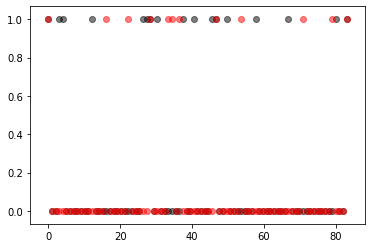

In [86]:
# plt.figure(1, figsize=(4, 3))

x_lnspace = np.linspace(0, len(X_test_predicted), len(X_test_predicted))
plt.scatter(x_lnspace, X_test_predicted, color='black', alpha=0.5)
plt.scatter(x_lnspace, y_test, color='red', alpha=0.5)
plt.plot(x_lnspace, X_test_proba, color='blue')
# plt.plot(X_test_predicted)
# plt.clf()
plt.show()